# 3	システム入門（２）

ここではデータの前処理について学ぶ。
pandasでCSVを扱う

# pandasによるデータの前処理

### Pandasモジュールのインポート 

In [1]:
import pandas as pd

### CSVファイルの読み込み

CSVファイルとは、１つの行がコンマ（,）で区切られたファイル（コンマ区切りファイル）のことです。

TSVファイルとは、１つの行がタブ（\t）で区切られたファイル（タブ区切りファイル）のことです。

- ヘッダーがある場合: `df = pd.read_csv('example.csv')`
- ヘッダーがない場合: `df = pd.read_csv('example.csv', header=None)`
- TSVの場合: `df = pd.read_csv('example.tsv', sep='\t')`


In [2]:
df1 = pd.read_csv('3_sample_1.csv')

### データフレームの状態を確認する

In [5]:
# 行数・列数の確認
df1.shape

(530, 28)

In [9]:
# 行のIndex（添字）の範囲の確認
df1.index

RangeIndex(start=0, stop=530, step=1)

In [7]:
# 列の確認
df1.columns

Index(['case_id', 'submitter_id', 'project_id', 'gender', 'year_of_birth',
       'race', 'ethnicity', 'year_of_death', 'classification_of_tumor',
       'last_known_disease_status', 'primary_diagnosis', 'tumor_stage',
       'age_at_diagnosis', 'vital_status', 'morphology', 'days_to_death',
       'days_to_last_known_disease_status', 'days_to_recurrence',
       'tumor_grade', 'tissue_or_organ_of_origin', 'days_to_birth',
       'progression_or_recurrence', 'prior_malignancy',
       'site_of_resection_or_biopsy', 'days_to_last_follow_up',
       'therapeutic_agents', 'treatment_intent_type', 'treatment_or_therapy'],
      dtype='object')

In [10]:
# 各列のデータ型の確認
df1.dtypes

case_id                              object
submitter_id                         object
project_id                           object
gender                               object
year_of_birth                         int64
race                                 object
ethnicity                            object
year_of_death                        object
classification_of_tumor              object
last_known_disease_status            object
primary_diagnosis                    object
tumor_stage                          object
age_at_diagnosis                     object
vital_status                         object
morphology                           object
days_to_death                        object
days_to_last_known_disease_status    object
days_to_recurrence                   object
tumor_grade                          object
tissue_or_organ_of_origin            object
days_to_birth                        object
progression_or_recurrence            object
prior_malignancy                

### データフレームのデータにアクセスする・抽出

In [14]:
# 10行目から14行目のデータにアクセスする
df1[10:14]

,case_id,submitter_id,project_id,gender,year_of_birth,race,ethnicity,year_of_death,classification_of_tumor,last_known_disease_status,...,tumor_grade,tissue_or_organ_of_origin,days_to_birth,progression_or_recurrence,prior_malignancy,site_of_resection_or_biopsy,days_to_last_follow_up,therapeutic_agents,treatment_intent_type,treatment_or_therapy
10,171044a9-9e8e-419b-af3a-4849d92c3b1e,TCGA-B0-5108,TCGA-KIRC,male,1955,white,not hispanic or latino,--,not reported,not reported,...,not reported,"Kidney, NOS",-19932.0,not reported,not reported,"Kidney, NOS",1782.0,--,--,--
11,77d8c2cf-6b27-417b-9d43-14c95e6f9b85,TCGA-B0-4841,TCGA-KIRC,male,1941,white,not hispanic or latino,2004,not reported,not reported,...,not reported,"Kidney, NOS",-23097.0,not reported,not reported,"Kidney, NOS",--,--,--,--
12,50f29fc7-c111-4101-b970-b1e1dd3388cf,TCGA-A3-3320,TCGA-KIRC,female,1953,white,not reported,--,not reported,not reported,...,not reported,"Kidney, NOS",-19138.0,not reported,not reported,"Kidney, NOS",1508.0,--,--,--
13,22b6724c-a59f-4796-8166-992253e8caf1,TCGA-A3-3319,TCGA-KIRC,male,1936,white,not reported,--,not reported,not reported,...,not reported,"Kidney, NOS",-25699.0,not reported,not reported,"Kidney, NOS",1130.0,--,--,--


In [17]:
# 10行目のデータにアクセスする
df1.loc[10]

case_id                              171044a9-9e8e-419b-af3a-4849d92c3b1e
submitter_id                                                 TCGA-B0-5108
project_id                                                      TCGA-KIRC
gender                                                               male
year_of_birth                                                        1955
race                                                                white
ethnicity                                          not hispanic or latino
year_of_death                                                          --
classification_of_tumor                                      not reported
last_known_disease_status                                    not reported
primary_diagnosis                          Clear cell adenocarcinoma, NOS
tumor_stage                                                     stage iii
age_at_diagnosis                                                    19932
vital_status                          

In [20]:
# 1・2・4行目、0・２列目のデータにアクセスする
df1.iloc[[1,2,4],[0,2]]

,case_id,project_id
1,4edff57f-4b0e-4770-beac-590da7d7232c,TCGA-KIRC
2,0df9ec46-d600-4845-9d00-2dc2732c68d1,TCGA-KIRC
4,1bc2ad71-fb9d-4012-bfe7-c39e215a51eb,TCGA-KIRC


In [30]:
# 条件を指定して行を抽出する
## 'year_of_birth' が1970以上、1980未満の行を抽出する
df1[(df1['year_of_birth'] >= 1970) & (df1['year_of_birth'] < 1980)]

,case_id,submitter_id,project_id,gender,year_of_birth,race,ethnicity,year_of_death,classification_of_tumor,last_known_disease_status,...,tumor_grade,tissue_or_organ_of_origin,days_to_birth,progression_or_recurrence,prior_malignancy,site_of_resection_or_biopsy,days_to_last_follow_up,therapeutic_agents,treatment_intent_type,treatment_or_therapy
15,7aece0e0-e57b-40b9-8ef3-8b98624b0e91,TCGA-B8-5546,TCGA-KIRC,female,1972,black or african american,not hispanic or latino,--,not reported,not reported,...,not reported,"Kidney, NOS",-14113.0,not reported,not reported,"Kidney, NOS",505.0,--,--,--
32,e9f855b3-291b-449d-9758-caa0f99fa76d,TCGA-B0-5084,TCGA-KIRC,male,1973,white,not hispanic or latino,2006,not reported,not reported,...,not reported,"Kidney, NOS",-12219.0,not reported,not reported,"Kidney, NOS",--,--,--,--
88,0bbfeec1-fbae-4c92-ae90-60ba39303bd8,TCGA-A3-3349,TCGA-KIRC,female,1972,white,not hispanic or latino,--,not reported,not reported,...,not reported,"Kidney, NOS",-12431.0,not reported,not reported,"Kidney, NOS",1385.0,--,--,--
150,fe1f95a3-a6c2-4a39-8586-f8a70e975dd4,TCGA-MM-A563,TCGA-KIRC,male,1971,black or african american,not hispanic or latino,--,not reported,not reported,...,not reported,"Kidney, NOS",-15037.0,not reported,not reported,"Kidney, NOS",591.0,--,--,--
249,dd35edfd-ee6c-461f-b2a6-2dff8324117c,TCGA-BP-4797,TCGA-KIRC,male,1973,white,not hispanic or latino,--,not reported,not reported,...,not reported,"Kidney, NOS",-12508.0,not reported,not reported,"Kidney, NOS",1107.0,--,--,--
259,a42103aa-0f25-4939-9f9d-9ec11a5c8cca,TCGA-A3-A8OW,TCGA-KIRC,male,1974,black or african american,not hispanic or latino,--,not reported,not reported,...,not reported,"Kidney, NOS",-13546.0,not reported,not reported,"Kidney, NOS",323.0,--,--,--
276,8593764c-e468-4229-94de-6ba614b4f068,TCGA-AS-3778,TCGA-KIRC,male,1975,white,not hispanic or latino,--,not reported,not reported,...,not reported,"Kidney, NOS",-12937.0,not reported,not reported,"Kidney, NOS",43.0,--,--,--
406,ea854858-1dad-4b01-8e58-f19e6a7c41a3,TCGA-DV-5574,TCGA-KIRC,male,1971,white,not hispanic or latino,--,not reported,not reported,...,not reported,"Kidney, NOS",-13517.0,not reported,not reported,"Kidney, NOS",2016.0,--,--,--
480,ae55b2d3-62a1-419e-9f9a-5ddfac356db4,TCGA-B0-5117,TCGA-KIRC,male,1970,white,not hispanic or latino,--,not reported,not reported,...,not reported,"Kidney, NOS",-14612.0,not reported,not reported,"Kidney, NOS",1608.0,--,--,--
523,5f53ace3-14ca-412a-af6c-98d8996f8177,TCGA-CW-6097,TCGA-KIRC,male,1972,white,not reported,2005,not reported,not reported,...,not reported,"Kidney, NOS",-11701.0,not reported,not reported,"Kidney, NOS",--,--,--,--


In [31]:
# 数値の列について、要約統計量を表示する
df1.describe()

,year_of_birth
count,530.000000
mean,1945.460377
std,12.654465
min,1912.000000
25%,1936.000000
50%,1946.000000
75%,1954.000000
max,1983.000000


### 欠損値

In [32]:
# 欠損値の有無を確認する
df1.isnull().sum()

case_id                              0
submitter_id                         0
project_id                           0
gender                               0
year_of_birth                        0
race                                 0
ethnicity                            0
year_of_death                        0
classification_of_tumor              0
last_known_disease_status            0
primary_diagnosis                    0
tumor_stage                          0
age_at_diagnosis                     0
vital_status                         0
morphology                           0
days_to_death                        0
days_to_last_known_disease_status    0
days_to_recurrence                   0
tumor_grade                          0
tissue_or_organ_of_origin            0
days_to_birth                        0
progression_or_recurrence            0
prior_malignancy                     1
site_of_resection_or_biopsy          0
days_to_last_follow_up               0
therapeutic_agents       

In [37]:
# １つでもNaNが含まれる行だけを抽出し、行数と列数を表示する
print(df1[df1.isnull().any(axis=1)].shape)

(1, 28)


In [38]:
# １つでもNaNが含まれる行だけを抽出し、最初の5行のみ表示する
df1[df1.isnull().any(axis=1)].head()

,case_id,submitter_id,project_id,gender,year_of_birth,race,ethnicity,year_of_death,classification_of_tumor,last_known_disease_status,...,tumor_grade,tissue_or_organ_of_origin,days_to_birth,progression_or_recurrence,prior_malignancy,site_of_resection_or_biopsy,days_to_last_follow_up,therapeutic_agents,treatment_intent_type,treatment_or_therapy
1,4edff57f-4b0e-4770-beac-590da7d7232c,TCGA-CJ-6033,TCGA-KIRC,female,1950,white,not hispanic or latino,2004,not reported,not reported,...,not reported,"Kidney, NOS",-19919.0,not reported,NaN,"Kidney, NOS",--,--,--,--


In [42]:
df1['prior_malignancy']

0      not reported
1               NaN
2      not reported
3      not reported
4      not reported
5      not reported
6      not reported
7      not reported
8      not reported
9      not reported
10     not reported
11     not reported
12     not reported
13     not reported
14     not reported
15     not reported
16     not reported
17     not reported
18     not reported
19     not reported
20     not reported
21     not reported
22     not reported
23     not reported
24     not reported
25     not reported
26     not reported
27     not reported
28     not reported
29     not reported
           ...     
500    not reported
501    not reported
502    not reported
503    not reported
504    not reported
505    not reported
506    not reported
507    not reported
508    not reported
509    not reported
510    not reported
511    not reported
512    not reported
513    not reported
514    not reported
515    not reported
516    not reported
517    not reported
518    not reported


In [44]:
# 欠損値を置き換える
## 'prior_malignancy'列にあるNaNを'0.0'に置き換える
df1.fillna(value={'prior_malignancy': 'not reported'}, inplace=True)

In [45]:
# 欠損値の有無を確認する（最初と結果が変わることに注意）
df1.isnull().sum()

case_id                              0
submitter_id                         0
project_id                           0
gender                               0
year_of_birth                        0
race                                 0
ethnicity                            0
year_of_death                        0
classification_of_tumor              0
last_known_disease_status            0
primary_diagnosis                    0
tumor_stage                          0
age_at_diagnosis                     0
vital_status                         0
morphology                           0
days_to_death                        0
days_to_last_known_disease_status    0
days_to_recurrence                   0
tumor_grade                          0
tissue_or_organ_of_origin            0
days_to_birth                        0
progression_or_recurrence            0
prior_malignancy                     0
site_of_resection_or_biopsy          0
days_to_last_follow_up               0
therapeutic_agents       

### データの保存


In [57]:
# CSVファイルの書き出し
df1.to_csv('3_sample_1_processed.csv', encoding='utf-8', index=False)

In [58]:
# TSVファイルの書き出し
df1.to_csv('3_sample_1_processed.tsv', encoding='utf-8', sep='\t', index=False)

## matplotlib によるグラフのプロット

> この部分は http://www.qbic.riken.jp/mbd/python_intro.html を参考にしている（古澤力さんに許可済み）

Pythonでグラフを作成する方法は様々なものがあります。
ここは広く用いられているライブラリであるmatplotlibを用いた方法を紹介します。

まず、以下のようにしてライブラリをインポートすると、以降はmatplotlibの関数をpltとして参照することになります。

In [59]:
import matplotlib.pyplot as plt

In [61]:
# numpyをnpとして参照
import numpy as np

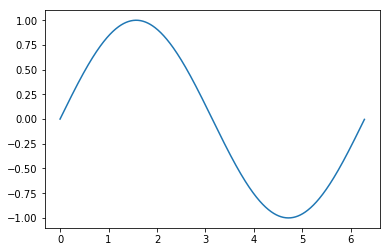

In [63]:
#np.piはnumpyで用意されている定数（円周率）。
# xに0から2piまでの範囲を0.01刻みで分割した長さ629のベクトルが代入される。
x=np.arange(0,2*np.pi,0.01)

y=np.sin(x)

# plt.plotは入力を2つとすると、最初の入力を横軸、次の入力を縦軸とします。
plt.plot(x,y)

plt.plotは入力を2つとすると、最初の入力を横軸、次の入力を縦軸とします。入力を一つとすると、下のように横軸をベクトルのインデックス（何番目の要素か）、縦軸をその要素の値としてプロットします。

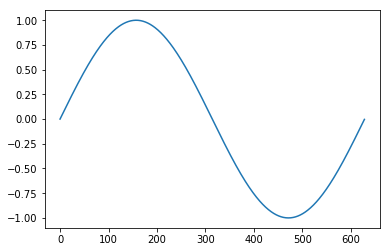

In [64]:
x=np.arange(0,2*np.pi,0.01)
y=np.sin(x)
plt.plot(y)     #上のグラフと縦軸の値は同一だけど、横軸が異なっていることに注意

複数のグラフを書くときには以下のようにします。加えて、範囲やラベルの指定方法を説明しています。コメントを見ると理解できると思います。

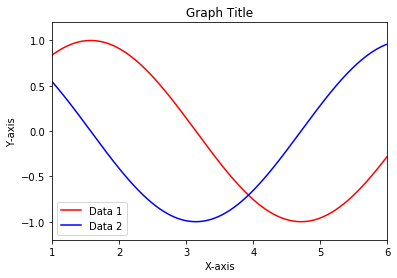

In [65]:
x=np.arange(0,2*np.pi,0.01)
y1=np.sin(x)
y2=np.cos(x)      #ここまでデータの用意

plt.plot(x,y1, label = "Data 1", color="r")   #sin(x)の描画。"label"でデータのラベルを指定。"color"で色を指定
plt.plot(x,y2, label = "Data 2", color="b")  #cos(x)の描画
#色の指定方法はいろいろとあるが、赤/青/緑/黄/シアン/マゼンダ/黒/白をr/b/g/y/c/m/k/wで指定可能

plt.legend() # 凡例を表示。場所は自動的に決められる。指定したければ、ple.legend(loc='upper right')などを用いる

plt.xlim(1.0,6.0)     #x軸の範囲を最小値、最大値で指定
plt.ylim(-1.2,1.2)    #y軸の範囲を最大値、最小値で指定

plt.title("Graph Title")    #グラフのタイトル
plt.xlabel("X-axis")        #x軸のタイトル
plt.ylabel("Y-axis")        #y軸のタイトル
plt.show()                    #上の指定やオプションなどを全部ひっくるめてグラフを表示

線ではなくて点でデータをプロットしたいときには、以下のようにします。　　



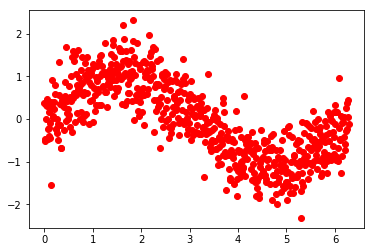

In [66]:
x=np.arange(0,2*np.pi,0.01)
y=np.sin(x)+0.5*np.random.randn(len(x)) #sin(x)に、正規分布に従う乱数を足しています。xの要素数はlen(x)なので、その数の乱数を用意しています。
plt.plot(x,y,"o",color="r")  #この"o"がプロットの形を指定しています。そのほか、"."（小さい点）、"+"、"x"、"*"などがあります。